In [32]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [66]:
# Заданные значения id и jd
id = 100
jd = 100

# Заданные начальные значения
w = np.zeros((id + 1, jd + 1))
c = np.zeros(id + 1)
a = np.zeros(id + 1)
cv = np.zeros(id + 1)
G = np.zeros((id + 1, jd + 1))

# Заданные значения
Mah = 0.

R = 5

dr = R / id
dtt = math.atan(1.0) * 4.0 / jd
r = np.linspace(1, R, id + 1)
theta = np.zeros(jd + 1)

# Заполнение массивов
for i in range(id + 1):
    a[i] = 0.5  * dr/ (r[i])
    c[i] = (dr / (r[i] * dtt))**2
    cv[i] = 0.5 / (r[i] * dtt)

for j in range (0, jd + 1):
    theta[j] = j * dtt
    
cu = 0.5 / dr

# Заполнение массива w
for j in range(jd + 1):
    costt = math.cos(theta[j])
    for i in range(id + 1):
        w[i, j] = (r[i] + 1 / r[i]) *  costt
        
w[0][:] = 0
w[id][:] = r[:] * np.cos(theta[:])
w[:][0] = 0
w[:][jd] = 0

In [67]:
def Plot(r, theta, Phi):
    fig = plt.figure(figsize=(10, 10))
    R, Theta = np.meshgrid(r, theta)
    ax = fig.add_subplot(111)
    c = ax.pcolormesh(R, Theta, Phi, cmap='viridis')
    plt.colorbar(c, ax=ax, label='')
    plt.xlabel('r', fontsize=18)
    plt.ylabel("theta", fontsize=18)
    plt.title("Phi", fontsize=18)
    plt.show()

In [68]:
def uvp(w):
    u = np.zeros((id + 1, jd + 1))
    v = np.zeros((id + 1, jd + 1))
    p = np.ones((id + 1, jd + 1))
    cMM = Mah * Mah * 0.2
    for j in range(1, jd):
        for i in range(1, id):
            u[i, j] = (w[i + 1, j] - w[i - 1, j]) * cu
            v[i, j] = (w[i, j + 1] - w[i, j - 1]) * cv[i]
            VV = u[i, j]**2 + v[i, j]**2
            q = (1. - VV) * cMM + 1
            p[i, j] = np.sqrt(q) * q**2
        u[0, j] =0
        v[0, j] = 0
        u[id, j] = np.cos(theta[j])
        v[id, j] = - np.sin(theta[j])
        p[0][j] = p[1][j]
        p[id][j] = p[id - 1][j]
    for i in range(0, id):
        u[i, 0] = 0
        u[i, jd] = 0
        v[i, 0] = 0
        v[i, jd] = 0
        p[i][0] = p[i][1]
        p[i][jd] = p[i][jd - 1]
    return u, v, p

def coeff(w):
    B = np.zeros((id + 1, jd + 1))
    D = np.zeros((id + 1, jd + 1))
    oE = np.zeros((id + 1, jd + 1))
    F = np.zeros((id + 1, jd + 1))
    H = np.zeros((id + 1, jd + 1))
    u, v, p = uvp(w)
    for j in range(1, jd):
        for i in range(1, id):
            B[i, j] = (p[i, j - 1] + p[i, j]) * 0.5 * c[i]
            H[i, j] = (p[i, j] + p[i, j + 1]) * 0.5 * c[i]
            Pim = (p[i - 1, j] + p[i, j]) * 0.5
            Pip = (p[i, j] + p[i + 1, j]) * 0.5
            Eij = Pip + Pim + B[i, j] + H[i, j]
            aP = a[i] * p[i, j]
            F[i, j] = Pip + aP
            D[i, j] = Pim - aP
            oE[i, j] = 1.0 / Eij
    return B, D, oE, F, H

def FEM(w, B, D, F, H, oE):
    ww = np.zeros((id + 1, jd + 1))

    for k in range(1):
        for i in range(1, id):
            for j in range(1, jd):
                ww[i, j] = (w[i, j - 1] * B[i, j] +
                            w[i - 1, j] * D[i, j] +
                            w[i + 1, j] * F[i, j] +
                            w[i, j + 1] * H[i, j]) * oE[i, j]
        
        ww[0, :] = 0
        for j in range(jd  + 1):
            ww[id, j] = r[id] * np.cos(theta[j])
#             ww[id, j] = w[id, j]
     #     ww[:, 0] = (ww[:, 1] * 4 - ww[:, 2]) / 3
    #     ww[:, jd] = (ww[:, jd - 1] * 4 - ww[:, jd - 2] ) / 3
        ww[:, 0] = 0
        ww[:, jd] = 0
    return ww

In [69]:
def plot_u(u):
    R, Theta = np.meshgrid(r, theta)
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    c = ax.contourf(R, Theta, u.T, cmap='viridis')
    plt.colorbar(c, label='Скорость u')
    plt.title('График скорости u в полярных координатах')
    ax.set_xlabel('r', fontsize=18)
    ax.set_ylabel('theta', fontsize=18)
    plt.show()
    
def plot_v(u):
    R, Theta = np.meshgrid(r, theta)
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    c = ax.contourf(R, Theta, u.T, cmap='viridis')
    plt.colorbar(c, label='Скорость u')
    plt.title('График скорости v в полярных координатах')
    ax.set_xlabel('r', fontsize=18)
    ax.set_ylabel('theta', fontsize=18)
    plt.show()
    
    
def plot_p(v):
    R, Theta = np.meshgrid(r, theta)
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    c = ax.contourf(R, Theta, p.T, cmap='viridis')
    plt.colorbar(c, label='Плотность')
    plt.title('График плотности в полярных координатах')
    plt.show()

In [70]:
w

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.00153846,  2.00055082,  1.99758888, ..., -1.99758888,
        -2.00055082, -2.00153846],
       [ 2.00592593,  2.00493612,  2.00196769, ..., -2.00196769,
        -2.00493612, -2.00592593],
       ...,
       [ 5.12325203,  5.12072402,  5.11314246, ..., -5.11314246,
        -5.12072402, -5.12325203],
       [ 5.1616129 ,  5.15906596,  5.15142764, ..., -5.15142764,
        -5.15906596, -5.1616129 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

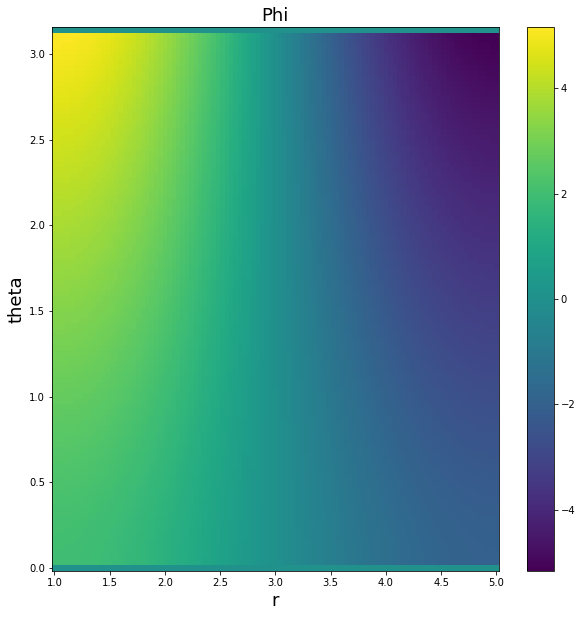

In [71]:
Plot(r, theta, w)

In [72]:
w

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.00153846,  2.00055082,  1.99758888, ..., -1.99758888,
        -2.00055082, -2.00153846],
       [ 2.00592593,  2.00493612,  2.00196769, ..., -2.00196769,
        -2.00493612, -2.00592593],
       ...,
       [ 5.12325203,  5.12072402,  5.11314246, ..., -5.11314246,
        -5.12072402, -5.12325203],
       [ 5.1616129 ,  5.15906596,  5.15142764, ..., -5.15142764,
        -5.15906596, -5.1616129 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [73]:
w.min()

-5.161612903225806

In [74]:
w.max()

5.161612903225806

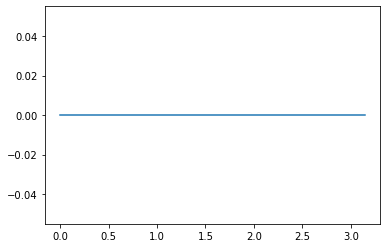

In [75]:
plt.plot(theta, w[id, :])

In [76]:
w[id, :].max()

0.0

In [77]:
w[id, :].min()

0.0

In [78]:
u, v, p = uvp(w)

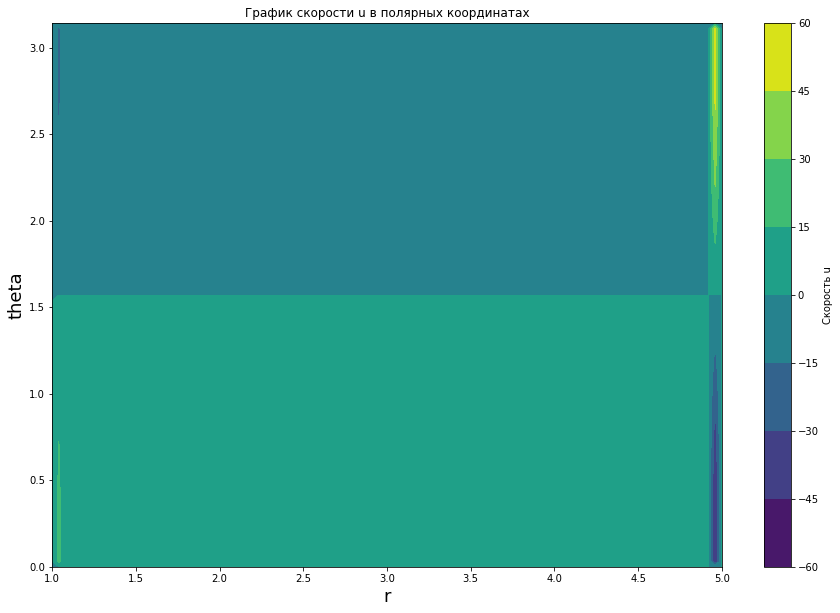

In [79]:
plot_u(u)

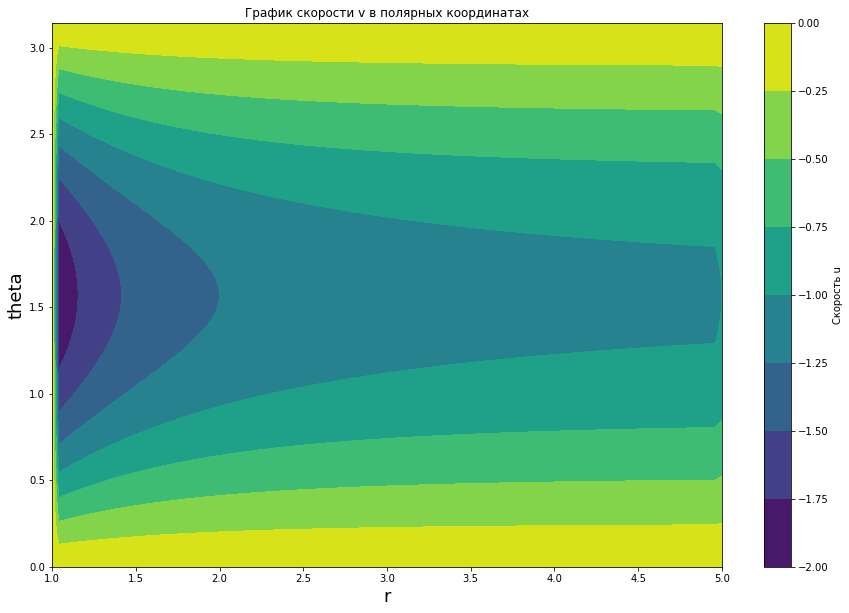

In [80]:
plot_v(v)

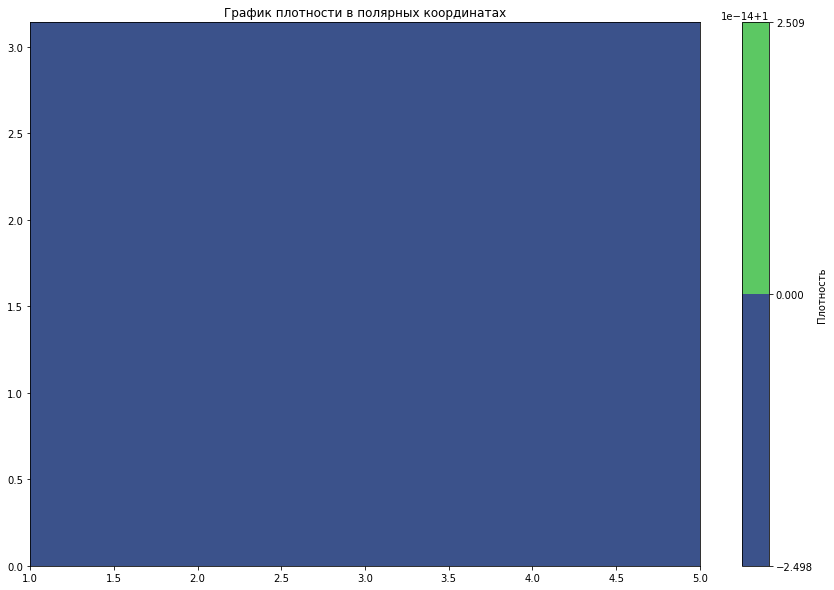

In [81]:
plot_p(p)

In [82]:
iter = 3000  # Устанавливаем количество итераций
for itr in range(iter):
    B, D, oE, F, H = coeff(w)
    w = FEM(w, B, D, F, H, oE)

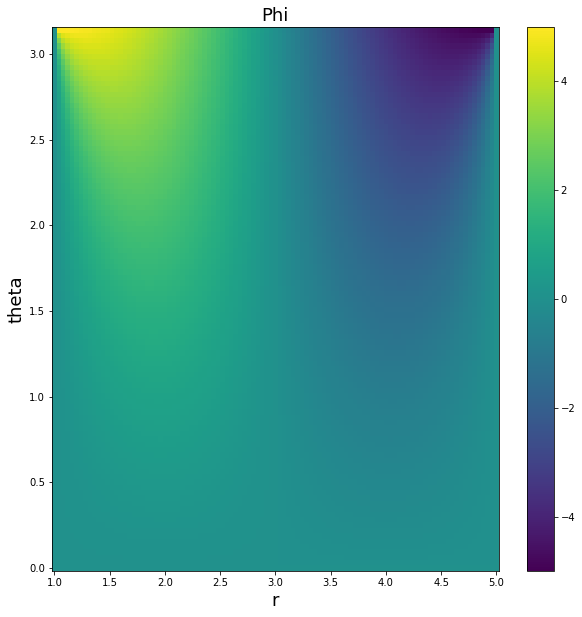

In [83]:
Plot(r, theta, w)

In [84]:
w.min()

-4.997532801828658

In [85]:
w.max()

4.997532801828658

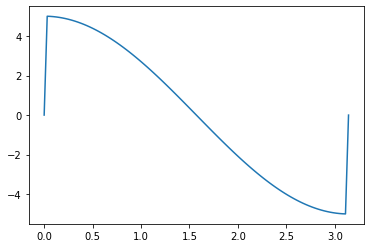

In [86]:
plt.plot(theta, w[id, :])

In [87]:
w[id, :].max()

4.997532801828658

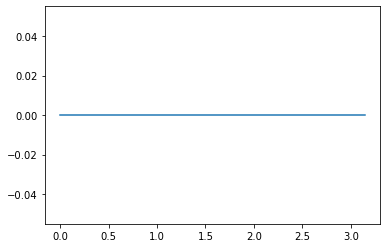

In [88]:
plt.plot(theta, w[0, :])

In [89]:
u, v, p = uvp(w)

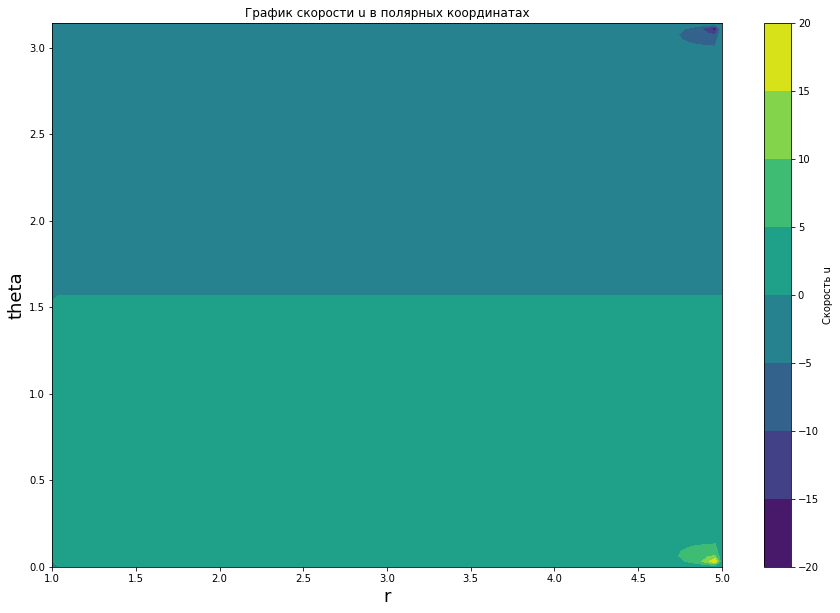

In [90]:
plot_u(u)

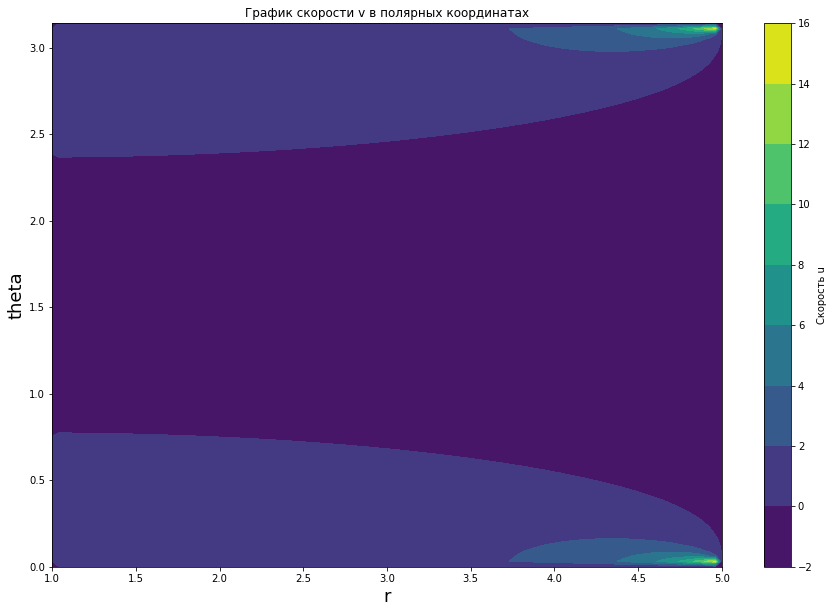

In [91]:
plot_v(v)

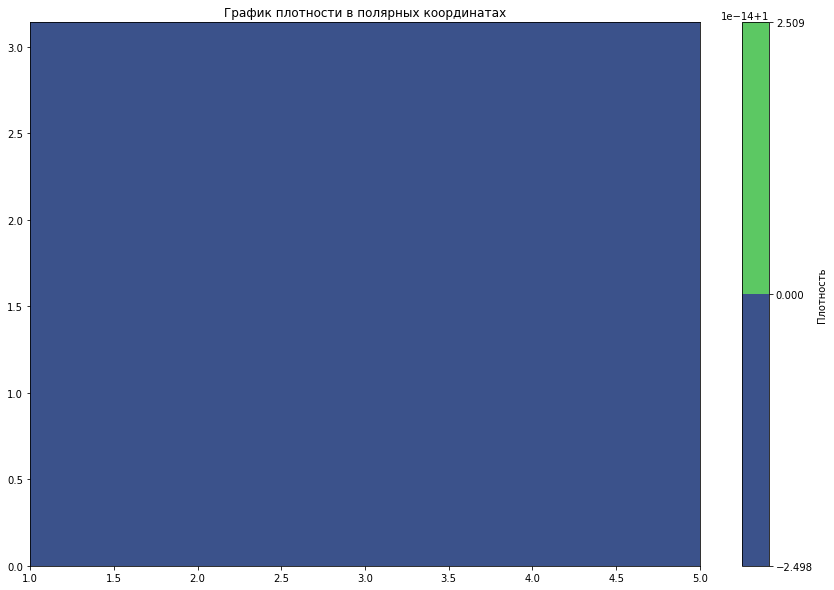

In [92]:
plot_p(p)

# plt.plot(theta, u[0, :])

In [61]:
a2 = 1.4 * p[0, :] **(1.4 - 1)

In [62]:
M2 = v[0, :]**2 / a2
M = np.sqrt(M2)

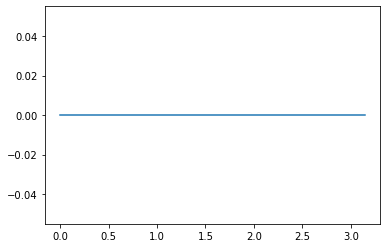

In [63]:
plt.plot(theta, M * Mah)

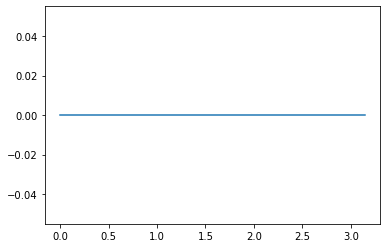

In [64]:
plt.plot(theta, u[0, :])

In [65]:
def plot_uvp(w):
    u, v,  p = uvp(w)
    R, Theta = np.meshgrid(r, theta)
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    c = ax.contourf(R, Theta, u.T, cmap='viridis')
    plt.colorbar(c, label='Скорость u')
    plt.title('График скорости u в полярных координатах')
    ax.set_xlabel('r', fontsize=18)
    ax.set_ylabel('theta', fontsize=18)
    plt.show()